# **Лабораторная работа № 4**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
#from sklearn.datasets import load_wine
#data2 = load_wine()
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [0]:
#
#data1.head()

In [0]:
#for col in data1.columns:
#    temp_null_count = data1[data1[col].isnull()].shape[0]
#    print('{} - {}'.format(col, temp_null_count))

In [0]:
#data = pd.read_csv("diabetes.csv")
#X=data.iloc[0:,0:8]
#X.head()
#y=data.iloc[0:,-1]
#y.head()
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [0]:
from sklearn.datasets import fetch_california_housing

# **Датасет данных о жилье в Калифорнии(пропуски отсутствуют, нет категориальных признаков для кодирования):**

In [0]:
data = fetch_california_housing()

In [0]:
#data.head()

In [0]:
for x in data:
    print(x)

data
target
feature_names
DESCR


# **Разбиение выборки:**

In [0]:
from sklearn.model_selection import train_test_split
#x=data.iloc[0:,0:8]
x=data.data
#x.head()
#y=data.iloc[0:,-1]
y=data.target
#y.head()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

# **Обучение модели ближайших соседей с произвольно заданным гиперпараметром:**

In [0]:
#print(x_train.head())
#print(x_test.head())

In [0]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressorObj = KNeighborsRegressor()
KNeighborsRegressorObj

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
KNeighborsRegressorObj.fit(x_train, y_train)
target2_1=KNeighborsRegressorObj.predict(x_test)

In [0]:
len(target2_1), target2_1

(6812, array([2.0076, 1.8152, 1.9406, ..., 1.2766, 2.2372, 1.547 ]))

# **Оценка качества модели с использованием подходящих метрик:**

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
#from sklearn.metrics import roc_curve, roc_auc_score
mean_absolute_error(y_test, target2_1)

0.82001825631239

In [0]:
mean_squared_error(y_test, target2_1)

1.1360970590205923

In [0]:
median_absolute_error(y_test, target2_1)

0.656401

In [0]:
r2_score(y_test, target2_1)

0.146285549833991

# **Кросс-валидация**

In [0]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), data.data, data.target, cv=3)
#scores
#np.mean(scores)

In [77]:
scores

array([ 0.08942206,  0.07663073, -0.00727265])

In [78]:
np.mean(scores)

0.05292671098955367

In [79]:
#explained_variance
#max_error
#Добавим несколько метрик
scoring = {'neg_mean_absolute_error', 
           'neg_mean_squared_error',
           'neg_median_absolute_error',
           'r2',
           'max_error',
           'explained_variance'}
scores = cross_validate(KNeighborsRegressor(n_neighbors=5), 
                        data.data, data.target, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.02059913, 0.01460958, 0.01455784]),
 'score_time': array([0.04011416, 0.03742957, 0.03828692]),
 'test_explained_variance': array([0.09405041, 0.07825933, 0.05755802]),
 'test_max_error': array([-4.04721, -3.95981, -4.33741]),
 'test_neg_mean_absolute_error': array([-0.87302279, -0.79852741, -0.9249041 ]),
 'test_neg_mean_squared_error': array([-1.22757547, -1.10340978, -1.43734607]),
 'test_neg_median_absolute_error': array([-0.724501, -0.6243  , -0.7331  ]),
 'test_r2': array([ 0.08942206,  0.07663073, -0.00727265]),
 'train_explained_variance': array([0.4389807 , 0.44965018, 0.45702522]),
 'train_max_error': array([-3.199808, -3.512408, -3.295008]),
 'train_neg_mean_absolute_error': array([-0.6615114 , -0.68106424, -0.63019527]),
 'train_neg_mean_squared_error': array([-0.73995729, -0.77259246, -0.69325153]),
 'train_neg_median_absolute_error': array([-0.5273, -0.5494, -0.4904]),
 'train_r2': array([0.43776925, 0.4479288 , 0.45539965])}

# **Стратегия 1:**

In [80]:
#K-Fold
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsRegressor(n_neighbors=5), 
                         data.data, data.target, scoring=scoring, 
                         cv=kf, return_train_score=True)
scores

{'fit_time': array([0.03301859, 0.01943374, 0.02062464, 0.0199368 , 0.01965833]),
 'score_time': array([0.0273335 , 0.02370882, 0.13579059, 0.02444959, 0.02442241]),
 'test_explained_variance': array([ 0.08611725,  0.09408026,  0.13821535, -0.01643905,  0.13420392]),
 'test_max_error': array([-3.83401, -4.04721, -3.9868 , -3.91961, -4.34241]),
 'test_neg_mean_absolute_error': array([-0.86581377, -0.7749557 , -0.88992606, -0.88476702, -0.93090844]),
 'test_neg_mean_squared_error': array([-1.12793334, -1.08765125, -1.39321723, -1.23392298, -1.44103421]),
 'test_neg_median_absolute_error': array([-0.7757, -0.5784, -0.6762, -0.7645, -0.7321]),
 'test_r2': array([-0.0499511 ,  0.07083077,  0.03149977, -0.05177241,  0.01106559]),
 'train_explained_variance': array([0.45104821, 0.46043257, 0.45277795, 0.47567216, 0.45748092]),
 'train_max_error': array([-3.395808, -3.452408, -3.512408, -3.452408, -3.395808]),
 'train_neg_mean_absolute_error': array([-0.66201964, -0.66290899, -0.63746003, -0.6

In [0]:
#kf = LeaveOneOut()

In [0]:
#kf = LeavePOut(2)
#scores = cross_val_score(KNeighborsRegressor(n_neighbors=2), 
#                         data.data, data.target, scoring='neg_mean_absolute_error', 
#                         cv=kf)
#scores

# **Стратегия 2:**

In [81]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_validate(KNeighborsRegressor(n_neighbors=5), 
                         data.data, data.target, scoring=scoring, 
                         cv=kf, return_train_score=True)
scores

{'fit_time': array([0.02485085, 0.01900673, 0.01945448, 0.02046108, 0.01931548]),
 'score_time': array([0.02912545, 0.02912283, 0.02868509, 0.02853417, 0.03168583]),
 'test_explained_variance': array([0.13594097, 0.13847265, 0.14608201, 0.12522304, 0.15411858]),
 'test_max_error': array([-4.17581, -4.00781, -3.92221, -4.17401, -3.94501]),
 'test_neg_mean_absolute_error': array([-0.8367783 , -0.83489776, -0.82009248, -0.83760976, -0.82979485]),
 'test_neg_mean_squared_error': array([-1.1689623 , -1.17981427, -1.12594811, -1.19815902, -1.15452878]),
 'test_neg_median_absolute_error': array([-0.6658  , -0.6606  , -0.6673  , -0.6536  , -0.661598]),
 'test_r2': array([0.1327442 , 0.13510542, 0.14302162, 0.12066656, 0.14933073]),
 'train_explained_variance': array([0.45254202, 0.44933859, 0.44999685, 0.45081511, 0.45157425]),
 'train_max_error': array([-3.480008, -3.452408, -3.452408, -3.457408, -3.452408]),
 'train_neg_mean_absolute_error': array([-0.6560425 , -0.65519779, -0.65850667, -0.6

# **Стратегия 3:**

In [82]:
skf = StratifiedKFold(n_splits=3)
scores = cross_validate(KNeighborsRegressor(n_neighbors=5), 
                         data.data, data.target, scoring=scoring, 
                         cv=kf, return_train_score=True)
scores

{'fit_time': array([0.0220511 , 0.01954985, 0.02040076, 0.01952934, 0.01926112]),
 'score_time': array([0.03333974, 0.02903891, 0.02912569, 0.02949739, 0.02892232]),
 'test_explained_variance': array([0.13822771, 0.16750964, 0.16106668, 0.15542754, 0.14842437]),
 'test_max_error': array([-3.95961, -3.7574 , -4.34741, -4.02601, -4.19861]),
 'test_neg_mean_absolute_error': array([-0.83357843, -0.82667521, -0.81878238, -0.80976838, -0.81899329]),
 'test_neg_mean_squared_error': array([-1.17316112, -1.15360182, -1.13768852, -1.10057008, -1.13360017]),
 'test_neg_median_absolute_error': array([-0.667701, -0.658401, -0.6416  , -0.6559  , -0.658198]),
 'test_r2': array([0.13659913, 0.16255585, 0.15776543, 0.15381193, 0.14463861]),
 'train_explained_variance': array([0.44746549, 0.44125961, 0.4425836 , 0.44239222, 0.44776412]),
 'train_max_error': array([-3.382408, -3.452408, -3.395808, -3.528408, -3.462408]),
 'train_neg_mean_absolute_error': array([-0.65700164, -0.65951543, -0.66132916, -0.6

In [0]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

# **Подбор гиперпараметра с GriDSearchCV**

In [83]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [111]:
#test=ShuffleSplit()
#test

ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None)

In [99]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

#clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
#clf_gs.fit(data.data, data.target)
clf_rs = RandomizedSearchCV(KNeighborsRegressor(), tuned_parameters, cv=ShuffleSplit(), scoring='neg_mean_absolute_error')
clf_rs.fit(data.data, data.target)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
                   error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_absolute_error',
                   verbose=0)

In [107]:
clf_rs.best_params_

{'n_neighbors': 5}

In [101]:
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=ShuffleSplit(), scoring='neg_mean_absolute_error')
clf_gs.fit(data.data, data.target)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [109]:
clf_gs.cv_results_

{'mean_fit_time': array([0.02351162, 0.02266765, 0.02260883, 0.02307355, 0.02268093,
        0.02268136, 0.02261248, 0.02272775, 0.02263823, 0.02278049]),
 'mean_score_time': array([0.01279907, 0.01530466, 0.01707008, 0.01960509, 0.02129235,
        0.02387059, 0.02496018, 0.02808068, 0.02937937, 0.03181584]),
 'mean_test_score': array([-0.81203015, -0.81503612, -0.8230933 , -0.83207381, -0.84000791,
        -0.846717  , -0.85183971, -0.85686798, -0.86108694, -0.863922  ]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30},
  {'n_neighbors': 35},
  {'n_neighbors': 40},
  {'n_neighbors': 45},
  {'n_neighbors': 50}],
 'rank_test_score': array([ 1,  2,  3

In [110]:
clf_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [106]:
clf_gs.best_params_

{'n_neighbors': 5}

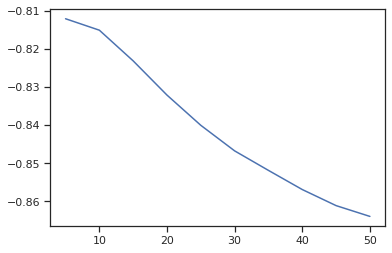

In [103]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

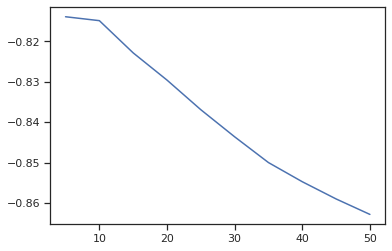

In [104]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

In [105]:
clf_gs.best_estimator_.fit(x_train, y_train)
target2_1 = clf_gs.best_estimator_.predict(x_test)
mean_absolute_error(y_test, target2_1)

0.82001825631239

# **Качество модели с подобранным гиперпараметром такое же, как и с взятым произвольно гиперпараметром, так как мы угадали лучшее значение гиперпараметра изначально**

# **Кривые обучения и валидации**

In [0]:
from sklearn.model_selection import learning_curve, validation_curve

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

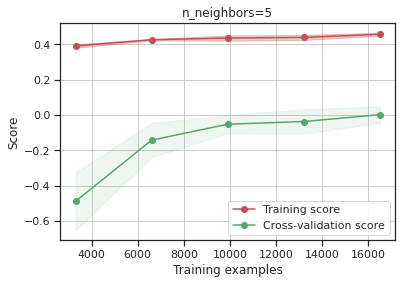

In [124]:
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=5', 
                    data.data, data.target, cv=5, train_sizes=np.linspace(.2, 1.0, 5))

In [0]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="neg_mean_absolute_error"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [0]:
#plot_validation_curve(KNeighborsClassifier(), 'knn', 
#                      iris_X_train, iris_y_train, 
#                      param_name='n_neighbors', param_range=n_range, 
#                      cv=20, scoring="accuracy")

In [0]:
n_range2 = np.array(range(5,125,5))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

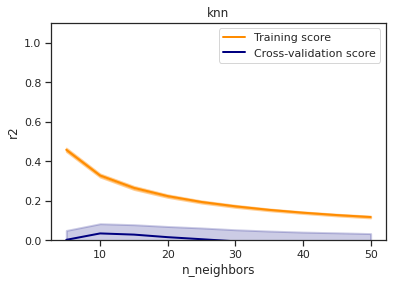

In [131]:
plot_validation_curve(KNeighborsRegressor(), 'knn', 
                      data.data, data.target, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=5, scoring="r2")